In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#loading the dataset 
shroom = pd.read_csv('./cleaned_up_secondary_mushroom_dataset.csv')

In [2]:
features_to_drop = [
    'gill-attachment', 'gill-spacing', 'cap-surface',
    'stem-root', 'stem-surface', 'veil-type',
    'veil-color', 'spore-print-color'
]
shroom = shroom.drop(columns=features_to_drop)
# converting target letters to numerical values
shroom['class'] = shroom['class'].map({'e': 0, 'p': 1})
#converting other features 
for column in shroom.columns:
    if column != 'class' and shroom[column].dtype == 'object':
        # Create numerical mapping for each feature
        unique_values = shroom[column].unique()
        mapping = {value: idx for idx, value in enumerate(unique_values)}
        shroom[column] = shroom[column].map(mapping)

#sperating data and dargets 
shroom_data = shroom.iloc[:, 1:].to_numpy()  
shroom_targets = shroom['class'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    shroom_data, 
    shroom_targets,
    test_size=0.25, 
    random_state=42,
    stratify=shroom_targets 
)


#testing
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training targets shape:", y_train.shape)
print("Test targets shape:", y_test.shape)

We then used SVM with our dataset with and without PCA. This takes a while to run.

In [3]:
pca_svm = PCA(n_components=2)
svm_model = SVC(kernel='linear', C=1.0)
scaler_svm = StandardScaler()
pipe_svm = Pipeline(steps=[("scaler", scaler_svm), ("pca", pca_svm), ("SVM", svm_model)])
pipe_svm.fit(X_train, y_train)

y_pred_test_pca_svm = pipe_svm.predict(X_test)
y_pred_train_pca_svm = pipe_svm.predict(X_train)

accuracy_test_pca_svm = round(accuracy_score(y_test, y_pred_test_pca_svm), 4)
accuracy_train_pca_svm = round(accuracy_score(y_train, y_pred_train_pca_svm), 4)

svm_model.fit(X_train, y_train)

y_pred_test_svm_no_pca = svm_model.predict(X_test)
y_pred_train_svm_no_pca = svm_model.predict(X_train)

accuracy_test_svm_no_pca = round(accuracy_score(y_test, y_pred_test_svm_no_pca), 4)
accuracy_train_svm_no_pca = round(accuracy_score(y_train, y_pred_train_svm_no_pca), 4)

print("SVM Using PCA:")
print(f"-Test Set: {accuracy_test_pca_svm}")
print(f"-Training Set: {accuracy_train_pca_svm}")

print("\nSVM with no PCA:")
print(f"Test Set: {accuracy_test_svm_no_pca}")
print(f"Training Set: {accuracy_train_svm_no_pca}")

SVM Using PCA:
-Test Set: 0.5744
-Training Set: 0.5691

SVM with no PCA:
Test Set: 0.6253
Training Set: 0.6273


In [4]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score: {:.2f}".format(knn_model.score(X_test, y_test)))

Test set predictions:
 [1 1 0 ... 0 0 0]
Test set score: 0.99
Test set score: 0.99


In [5]:
pca = PCA(n_components=10)
logreg_model = LogisticRegression(max_iter=1000)
scaler = StandardScaler()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logreg_model)])
pipe.fit(X_train, y_train)

y_pred_test_pca = pipe.predict(X_test)
y_pred_train_pca = pipe.predict(X_train)

accuracy_test_pca = round(accuracy_score(y_test, y_pred_test_pca), 4)
accuracy_train_pca = round(accuracy_score(y_train, y_pred_train_pca), 4)

logreg_model.fit(X_train, y_train)

y_pred_test_no_pca = logreg_model.predict(X_test)
y_pred_train_no_pca = logreg_model.predict(X_train)

accuracy_test_no_pca = round(accuracy_score(y_test, y_pred_test_no_pca), 4)
accuracy_train_no_pca = round(accuracy_score(y_train, y_pred_train_no_pca), 4)

print("Using PCA:")
print(f"-Test Set: {accuracy_test_pca}")
print(f"-Training Set: {accuracy_train_pca}")

print("\nNo PCA:")
print(f"-Test Set: {accuracy_test_no_pca}")
print(f"-Training Set: {accuracy_train_no_pca}")

Using PCA:
-Test Set: 0.5736
-Training Set: 0.57

No PCA:
-Test Set: 0.6108
-Training Set: 0.6164


In [ ]:
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
print("SVM Confusion Matrix:\n", svm_conf_matrix)

array([[<Axes: xlabel='cap-diameter', ylabel='cap-diameter'>,
        <Axes: xlabel='cap-shape', ylabel='cap-diameter'>,
        <Axes: xlabel='cap-color', ylabel='cap-diameter'>,
        <Axes: xlabel='does-bruise-or-bleed', ylabel='cap-diameter'>,
        <Axes: xlabel='gill-color', ylabel='cap-diameter'>,
        <Axes: xlabel='stem-height', ylabel='cap-diameter'>,
        <Axes: xlabel='stem-width', ylabel='cap-diameter'>,
        <Axes: xlabel='stem-color', ylabel='cap-diameter'>,
        <Axes: xlabel='has-ring', ylabel='cap-diameter'>,
        <Axes: xlabel='ring-type', ylabel='cap-diameter'>,
        <Axes: xlabel='habitat', ylabel='cap-diameter'>],
       [<Axes: xlabel='cap-diameter', ylabel='cap-shape'>,
        <Axes: xlabel='cap-shape', ylabel='cap-shape'>,
        <Axes: xlabel='cap-color', ylabel='cap-shape'>,
        <Axes: xlabel='does-bruise-or-bleed', ylabel='cap-shape'>,
        <Axes: xlabel='gill-color', ylabel='cap-shape'>,
        <Axes: xlabel='stem-height', yl

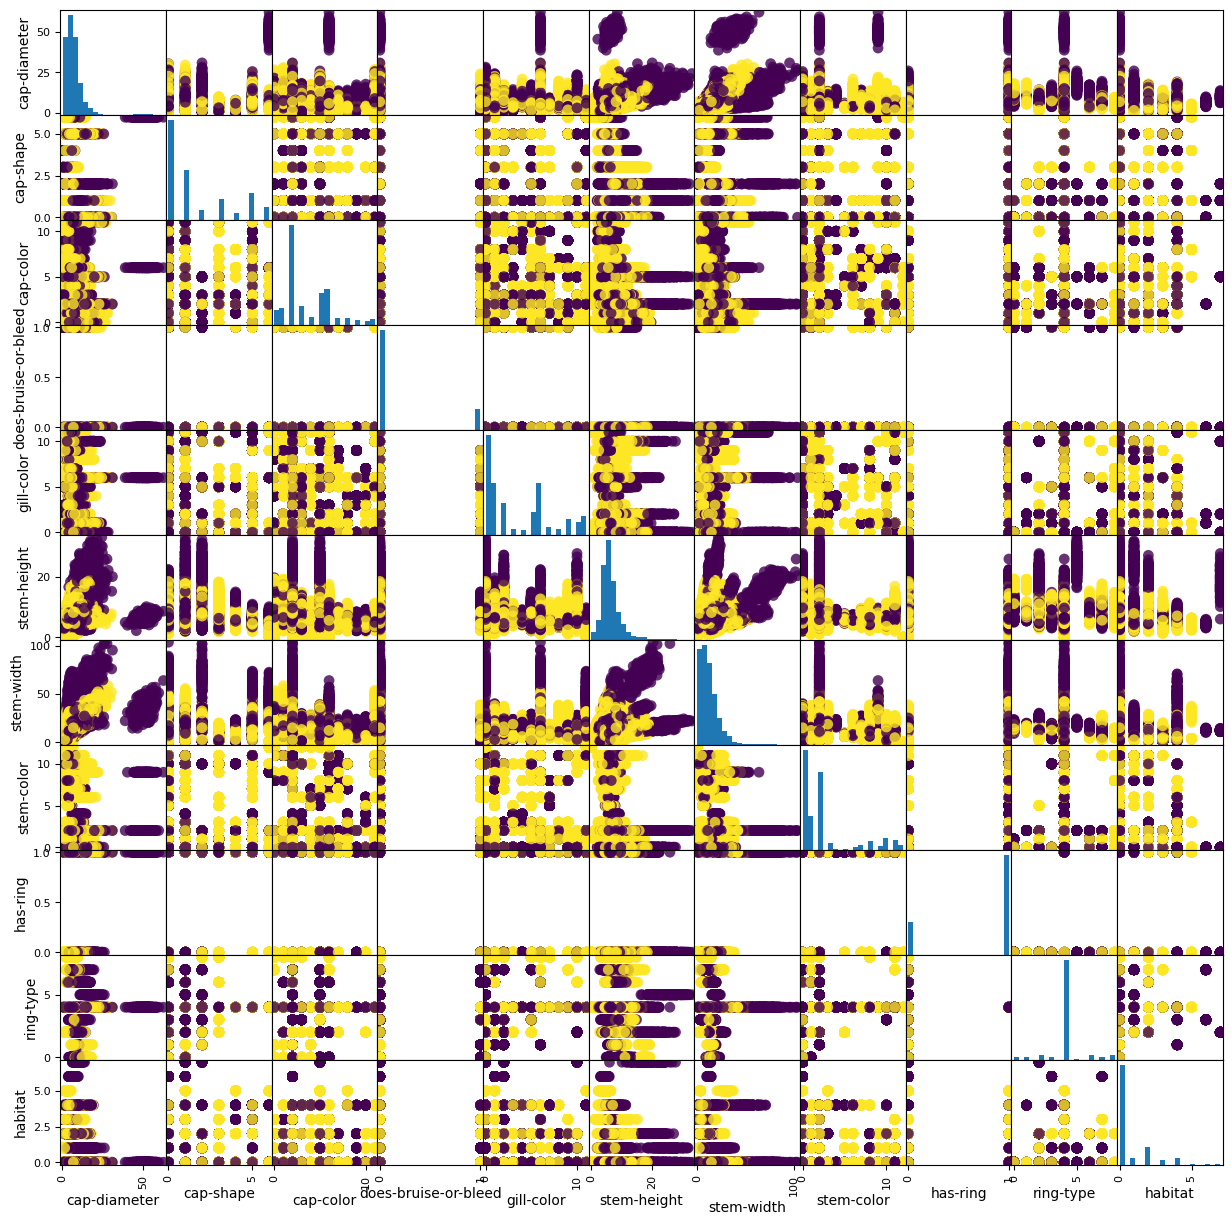

In [17]:
mushroom_dataframe = pd.DataFrame(X_train, columns=shroom.iloc[:, 1:].columns)
pd.plotting.scatter_matrix(mushroom_dataframe, c=y_train, figsize=(100,100),
                           marker='o', hist_kwds={'bins': 20}, s=60, alpha=0.8)